<a href="https://colab.research.google.com/github/Edna-soso/DataAnalysis_Project/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [269]:
%matplotlib inline

In [270]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px

import plotly.graph_objs as go

In [271]:
data = pd.read_csv('/content/drive/MyDrive/python_OP/Clean_Dataset.csv')

In [272]:
data.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
           ...  
397919    541904
397920    541905
397921    541906
397922    541907
397923    541908
Name: Unnamed: 0, Length: 397924, dtype: int64

In [273]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Hour,Month,Year,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,20.34


In [274]:
moving_column= data.pop("TotalCost")
data.insert(6,"TotalCost", moving_column)


In [275]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalCost,CustomerID,Country,Date,Time,Hour,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,15.30,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,20.34,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,22.00,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,20.34,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,20.34,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010


In [276]:
moving_column= data.pop("InvoiceDate")
data.insert(7,"InvoiceDate", moving_column)

In [277]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,TotalCost,CustomerID,InvoiceDate,Country,Date,Time,Hour,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010


# **Tháng có doanh số cao nhất?**

In [278]:
gr_month= data.groupby("Month").sum()["TotalCost"]
gr_month

Month
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12    1090906.680
Name: TotalCost, dtype: float64

In [279]:
gr_month.max()

1161817.3799999433

Trực quan totalCost theo month

Text(0, 0.5, 'TotalCost')

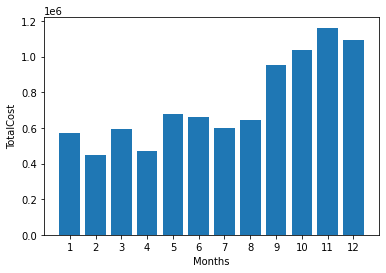

In [280]:
months = range(1,13)
plt.bar(months, gr_month, align='center')
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("TotalCost")

#**Country nào có doanh số cao nhất** 

In [281]:
gr_country = data.groupby("Country").sum()["TotalCost"]
gr_country.max()
country = [country for country, totalcost in gr_country.items()]

In [282]:
df= data
df = go.Bar(x = country, y = gr_country,marker={'color': gr_country,'colorscale': 'Viridis'})
layout = go.Layout(title = 'Country')
fig = go.Figure(data=df , layout = layout)
fig.show()

# **Doanh nghiệp nên quảng cáo vào khung giờ nào để tăng doanh thu?**

In [283]:
gr_hour = data.groupby("Hour").count()["TotalCost"]
gr_hour.max()
hour = [hour for hour, totalcost in gr_hour.items()]


Text(0, 0.5, 'TotalCost')

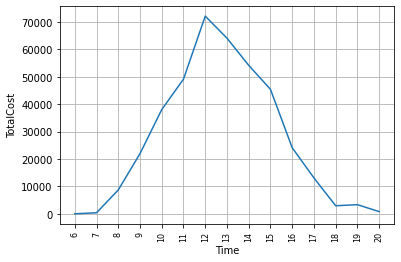

In [284]:
plt.plot(hour, gr_hour)
plt.grid()
plt.xticks(hour, rotation = 90, size=8)
plt.xlabel("Time")
plt.ylabel("TotalCost")


# **Sản phẩm nào bán chạy nhất và tại sao?**

In [285]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,TotalCost,CustomerID,InvoiceDate,Country,Date,Time,Hour,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010


In [286]:
all_products_pri =  data.groupby("StockCode").mean()["UnitPrice"]
all_products_pri.shape

(3665,)

In [287]:
all_products= data.groupby("StockCode").sum()['Quantity']
all_products



StockCode
10002      823
10080      291
10120      193
10123C       5
10124A      16
          ... 
C2         134
DOT         16
M         7179
PADS         4
POST      3120
Name: Quantity, Length: 3665, dtype: int64

In [288]:
product_ls = [StockCode for StockCode, Quantity in all_products.items()]
quan_ls = [int(Quantity) for StockCode, Quantity in all_products.items()]
price_ls = [UnitPrice for StockCode, UnitPrice in all_products_pri.items()]

arr_quan_pro=[]
arr_quan_pro.append(quan_ls)
arr_quan_pro.append(product_ls)
arr_quan_pro.append(price_ls)
all_products.shape

(3665,)

In [289]:
ind = np.argpartition(arr_quan_pro[0], -10)[-10:]
print(ind[1])
print( "MÃ sản phẩm", " | ", "Số lượng đã bán", " |   Giá")
for i in ind:
  print(arr_quan_pro[1][i], " : \t", arr_quan_pro[0][i], " :      \t",arr_quan_pro[2][i])

1919
MÃ sản phẩm  |  Số lượng đã bán  |   Giá
22492  : 	 26076  :      	 0.6565230769230804
23084  : 	 27202  :      	 2.0139429928740933
21212  : 	 33693  :      	 0.5482116104868929
84879  : 	 35362  :      	 1.6807954545454948
85123A  : 	 36782  :      	 2.89310565110558
84077  : 	 54415  :      	 0.29260042283298265
23843  : 	 80995  :      	 2.08
85099B  : 	 46181  :      	 2.015877626699588
22197  : 	 49183  :      	 0.8392883895131239
23166  : 	 77916  :      	 1.22030303030303


In [290]:
for i in range(len(data["StockCode"])):
  if data["StockCode"][i] == '23843' :
    print(data["Description"][i])



PAPER CRAFT , LITTLE BIRDIE



-----------------------------------------------------------------

---



---



---



---



In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
data.plot(x = 'InvoiceDate', y = 'TotalCost')
plt.title("Time Series Analysis of Sales", fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('TotalCost')
plt.show()

Thời gian mua hàng 

In [ ]:
# time-series plot for Australia

dataset = data[data['Country'] == 'Australia']
dataset.plot(x = 'InvoiceDate', y = 'TotalCost')
plt.title('Time-Series for Australia', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('TotalCost Amount')
plt.show()

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', width = 900, height = 900).generate(str(data['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

In [ ]:
data = [go.Bar(x = data['Country'].unique(), y = data['Country'].value_counts(),marker={'color': data['Country'].value_counts(),'colorscale': 'Viridis'})]
layout = go.Layout(title = 'Country')
fig = go.Figure(data = data, layout = layout)
fig.show()

#Tìm độ chêch lệch trên trục dữ liệu
Thống kê trong 1 ngày, tần số (Frequency) và lần mua gần nhất số lượng bao nhiêu (Recency) và số tiền thu nhập (Monetary) theo khách hàng.

In [ ]:
#tính lần mua gần nhất
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'].max()

In [ ]:
#Tính toán các yếu tố trong mô hình RFM
data['TotalAmount'] = data['UnitPrice']*data['Quantity']

Latest_date = dt.datetime(2011,12,10)
RFM_data = data.groupby('CustomerID').agg({'InvoiceDate' : lambda x :(Latest_date - x.max()).days,
                                          'InvoiceNo' : 'count','TotalAmount' : 'sum'}).reset_index()

RFM_data.rename(columns = {'InvoiceDate' : 'Recency',
                          'InvoiceNo' : "Frequency",
                          'TotalAmount' : "Monetary"},inplace = True)
RFM_data

In [ ]:
#Trực quan phân phối Recency, Frequency and Monetary.
i = 0
fig = plt.figure(constrained_layout = True,figsize = (20,5))
gs = GridSpec(1, 3, figure=fig)    

col = ['red','blue','green']
for var in list(RFM_data.columns[1:4]):
    plt.subplot(gs[0,i])
    sns.distplot(RFM_data[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(RFM_data[var].skew(),2).astype(str))
    i= i+1